In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv('C:/Education/Project/ObesityDataSet.csv')

# Удаление параметров роста, веса
df = df.drop(['Height', 'Weight'], axis=1)

# Преобразование целевой переменной в числовой формат
obesity_levels = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['NObeyesdad_num'] = df['NObeyesdad'].map(obesity_levels)

# Разделение на признаки и целевую переменную для простой модели
X_simple = df[['FAF', 'NCP']]
y = df['NObeyesdad_num']




Данные загружены и подготовлены
Размеры данных (простая модель): (1583, 2), (528, 2)
Классы: [0 1 2 3 4 5 6]


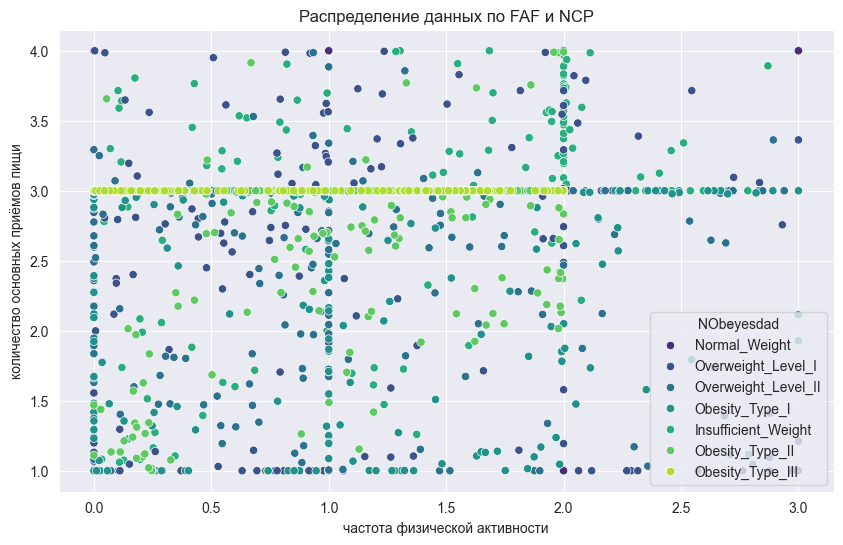

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
# Разделение на train/test для простой модели
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, random_state=42, stratify=y
)

print("Данные загружены и подготовлены")
print(f"Размеры данных (простая модель): {X_train_simple.shape}, {X_test_simple.shape}")
print(f"Классы: {np.unique(y)}")
# Визуализация данных для простой модели
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='FAF',
    y='NCP',
    hue='NObeyesdad',
    palette='viridis'
)
plt.title('Распределение данных по FAF и NCP')
plt.xlabel('частота физической активности')
plt.ylabel('количество основных приёмов пищи')
plt.show()

# Обучение простого дерева решений
dt_simple = DecisionTreeClassifier(random_state=42)
dt_simple.fit(X_train_simple, y_train)


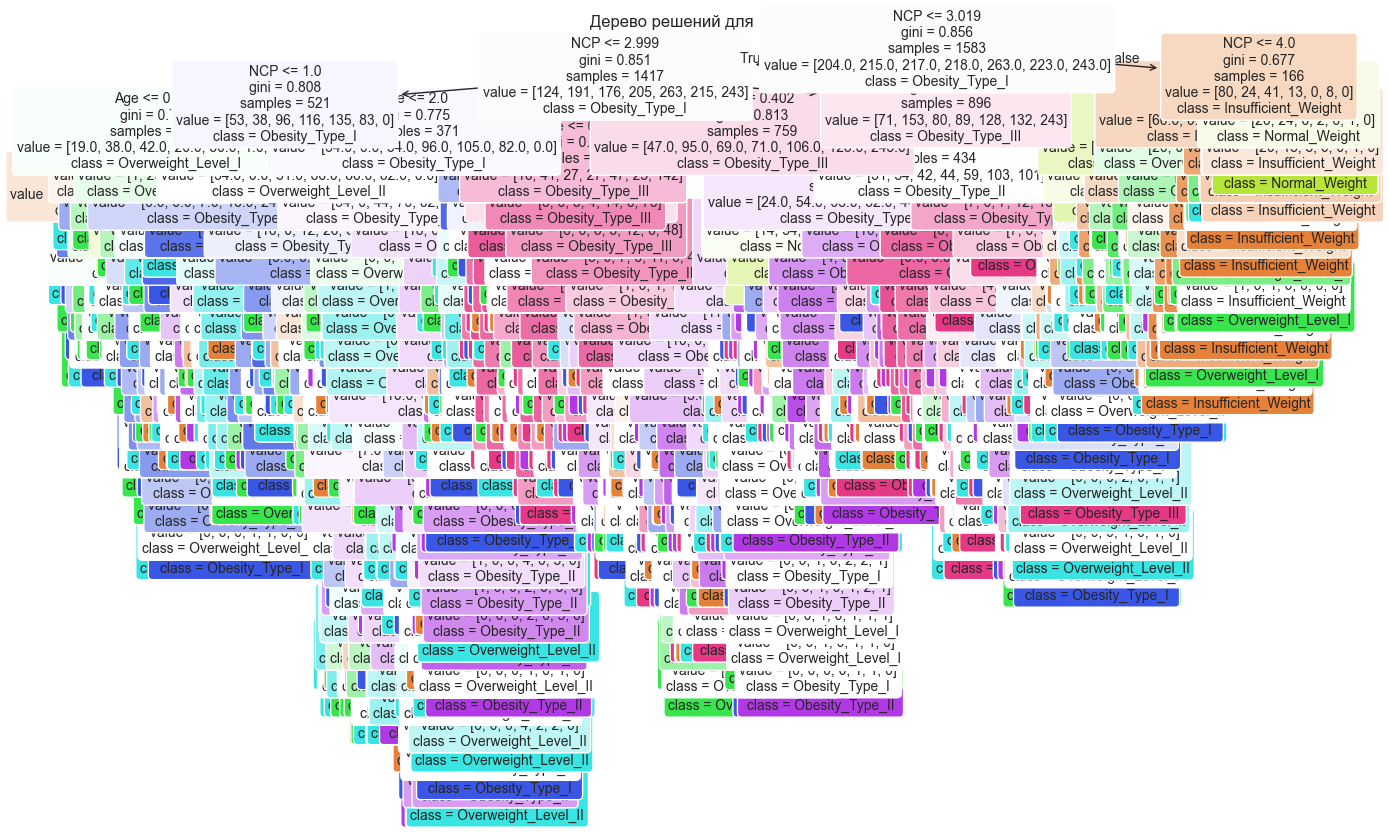

Оценка на трейне (простая модель)


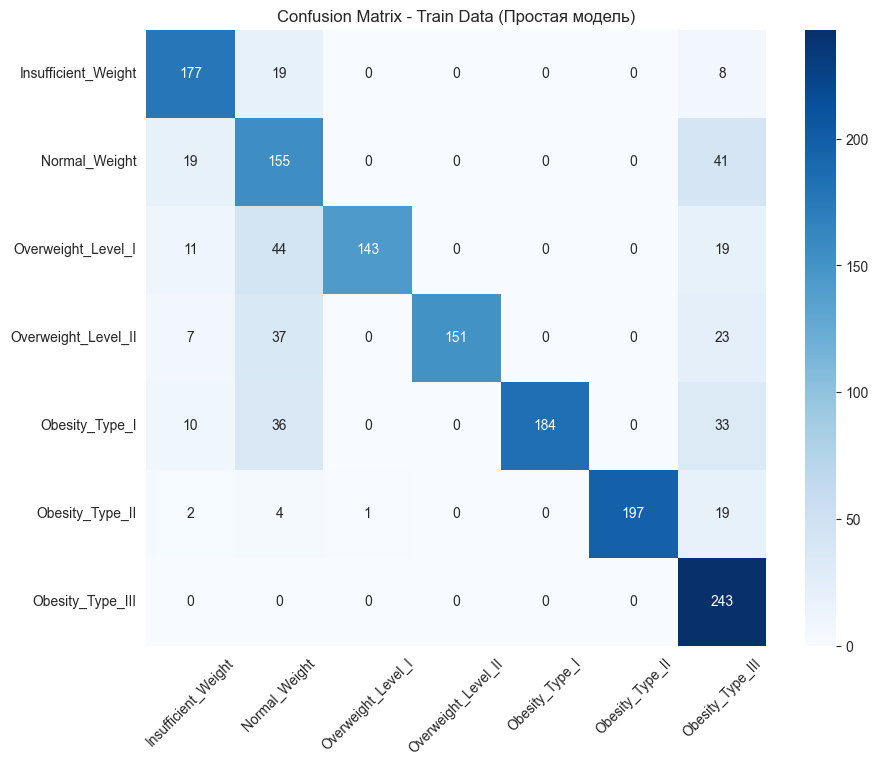

Classification Report - Train Data:
                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.87      0.82       204
      Normal_Weight       0.53      0.72      0.61       215
 Overweight_Level_I       0.99      0.66      0.79       217
Overweight_Level_II       1.00      0.69      0.82       218
     Obesity_Type_I       1.00      0.70      0.82       263
    Obesity_Type_II       1.00      0.88      0.94       223
   Obesity_Type_III       0.63      1.00      0.77       243

           accuracy                           0.79      1583
          macro avg       0.85      0.79      0.80      1583
       weighted avg       0.85      0.79      0.80      1583

Оценка на кросс-валидации (простая модель)


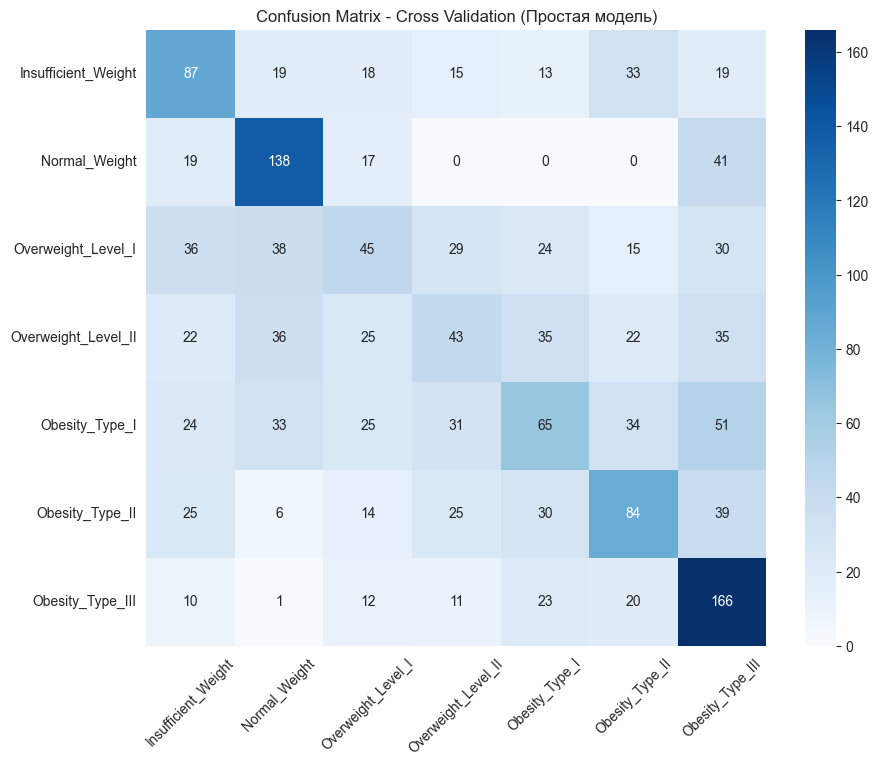

Classification Report - Cross Validation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.39      0.43      0.41       204
      Normal_Weight       0.51      0.64      0.57       215
 Overweight_Level_I       0.29      0.21      0.24       217
Overweight_Level_II       0.28      0.20      0.23       218
     Obesity_Type_I       0.34      0.25      0.29       263
    Obesity_Type_II       0.40      0.38      0.39       223
   Obesity_Type_III       0.44      0.68      0.53       243

           accuracy                           0.40      1583
          macro avg       0.38      0.40      0.38      1583
       weighted avg       0.38      0.40      0.38      1583



In [41]:
# Визуализация простого дерева
plt.figure(figsize=(15, 10))
plot_tree(
    dt_simple,
    feature_names=['Age', 'NCP'],
    class_names=list(obesity_levels.keys()),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Дерево решений для FAF и NCP')
plt.show()
# Оценка простой модели на тренировочных данных
y_pred_simple = dt_simple.predict(X_train_simple)
y_pred_cv_simple = cross_val_predict(dt_simple, X_train_simple, y_train, cv=5)

print('Оценка на трейне (простая модель)')
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_train, y_pred_simple),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=list(obesity_levels.keys()),
    yticklabels=list(obesity_levels.keys())
)
plt.title('Confusion Matrix - Train Data (Простая модель)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

report = classification_report(y_train, y_pred_simple, target_names=obesity_levels.keys())
print("Classification Report - Train Data:")
print(report)

print('Оценка на кросс-валидации (простая модель)')
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_train, y_pred_cv_simple),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=list(obesity_levels.keys()),
    yticklabels=list(obesity_levels.keys())
)
plt.title('Confusion Matrix - Cross Validation (Простая модель)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

report_cv = classification_report(y_train, y_pred_cv_simple, target_names=obesity_levels.keys())
print("Classification Report - Cross Validation:")
print(report_cv)





In [42]:
# Подбор гиперпараметров для простой модели
dtc = DecisionTreeClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'max_depth': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'min_samples_split': range(2, 11),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}




In [45]:
gs = GridSearchCV(
    dtc,
    param_grid=param_grid,
    cv=skf,
    scoring='f1_weighted',
    n_jobs=-1
)
gs.fit(X_train_simple, y_train)

print(f'Лучшие параметры (простая модель): {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации (простая модель): {gs.best_score_:.3f}')



Лучшие параметры (простая модель): {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4}
Лучшее качество на кросс-валидации (простая модель): 0.411



Classification Report - Train with Best Params (Простая модель):
                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.51      0.56       204
      Normal_Weight       0.55      0.65      0.59       215
 Overweight_Level_I       0.63      0.37      0.47       217
Overweight_Level_II       0.65      0.25      0.36       218
     Obesity_Type_I       0.55      0.36      0.44       263
    Obesity_Type_II       0.44      0.69      0.53       223
   Obesity_Type_III       0.49      0.85      0.62       243

           accuracy                           0.53      1583
          macro avg       0.56      0.53      0.51      1583
       weighted avg       0.56      0.53      0.51      1583


Classification Report - CV with Best Params (Простая модель):
                     precision    recall  f1-score   support

Insufficient_Weight       0.47      0.42      0.44       204
      Normal_Weight       0.51      0.68      0.59       215
 Overweight_L

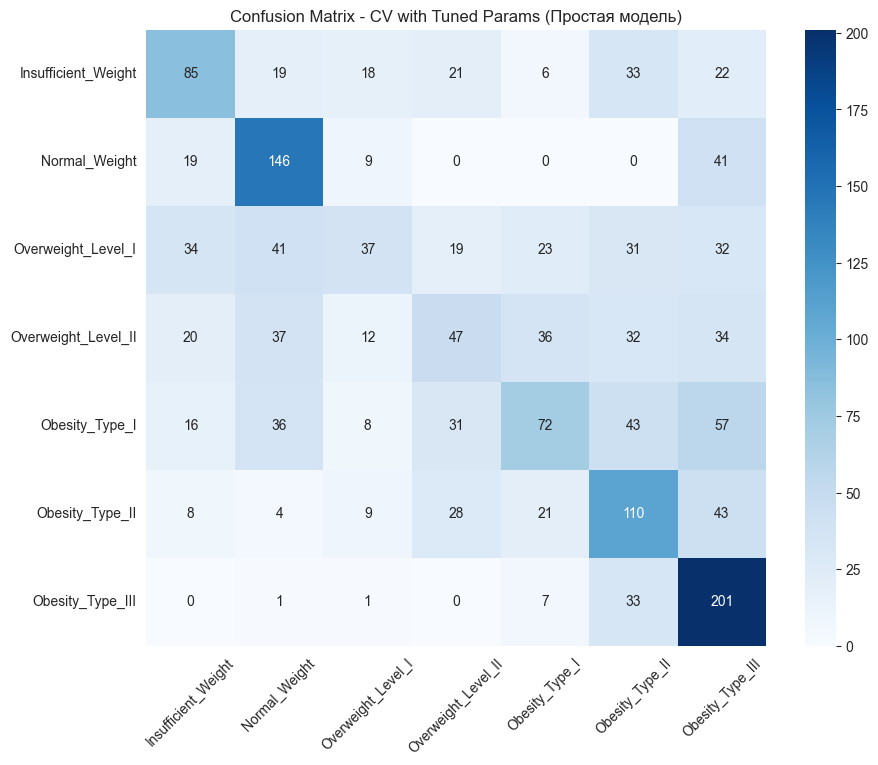

In [47]:
y_pred_train = gs.predict(X_train_simple)
print("\nClassification Report - Train with Best Params (Простая модель):")
print(classification_report(y_train, y_pred_train, target_names=obesity_levels.keys()))

y_pred_cv = cross_val_predict(gs.best_estimator_, X_train_simple, y_train, cv=skf, n_jobs=-1)
print("\nClassification Report - CV with Best Params (Простая модель):")
print(classification_report(y_train, y_pred_cv, target_names=obesity_levels.keys()))

plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_train, y_pred_cv),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=list(obesity_levels.keys()),
    yticklabels=list(obesity_levels.keys())
)
plt.title('Confusion Matrix - CV with Tuned Params (Простая модель)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

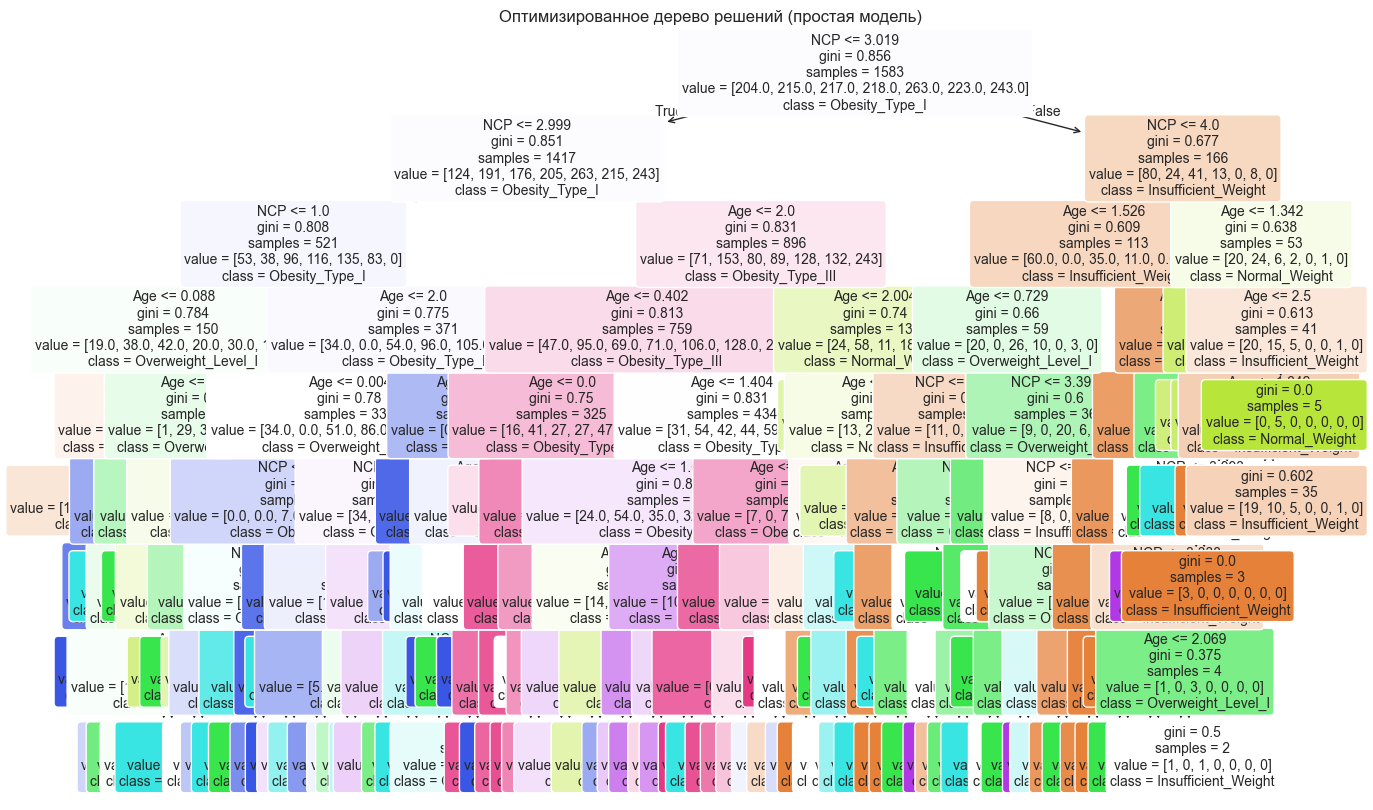

In [48]:
# Визуализация лучшего дерева для простой модели
plt.figure(figsize=(15, 10))
plot_tree(
    gs.best_estimator_,
    feature_names=['Age', 'NCP'],
    class_names=list(obesity_levels.keys()),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Оптимизированное дерево решений (простая модель)')
plt.show()

In [50]:
# Полная модель на всех признаках (кроме целевых и удаленных)
numeric_features = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC',
    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

# Преобразование категориальных признаков
X_full = pd.get_dummies(
    df[numeric_features + categorical_features],
    columns=categorical_features,
    drop_first=True
)

y_full = df['NObeyesdad_num']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, random_state=42, stratify=y_full
)

print(f"Размеры данных (полная модель): {X_train_full.shape}, {X_test_full.shape}")
print(f"Количество признаков: {X_train_full.shape[1]}")

Размеры данных (полная модель): (1583, 21), (528, 21)
Количество признаков: 21


Лучшие параметры (полная модель): {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшее качество на кросс-валидации (полная модель): 0.744

Classification Report - Full Model CV:
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.76      0.76       204
      Normal_Weight       0.54      0.54      0.54       215
 Overweight_Level_I       0.71      0.67      0.69       217
Overweight_Level_II       0.65      0.64      0.64       218
     Obesity_Type_I       0.68      0.73      0.70       263
    Obesity_Type_II       0.87      0.83      0.85       223
   Obesity_Type_III       0.99      1.00      0.99       243

           accuracy                           0.74      1583
          macro avg       0.74      0.74      0.74      1583
       weighted avg       0.74      0.74      0.74      1583



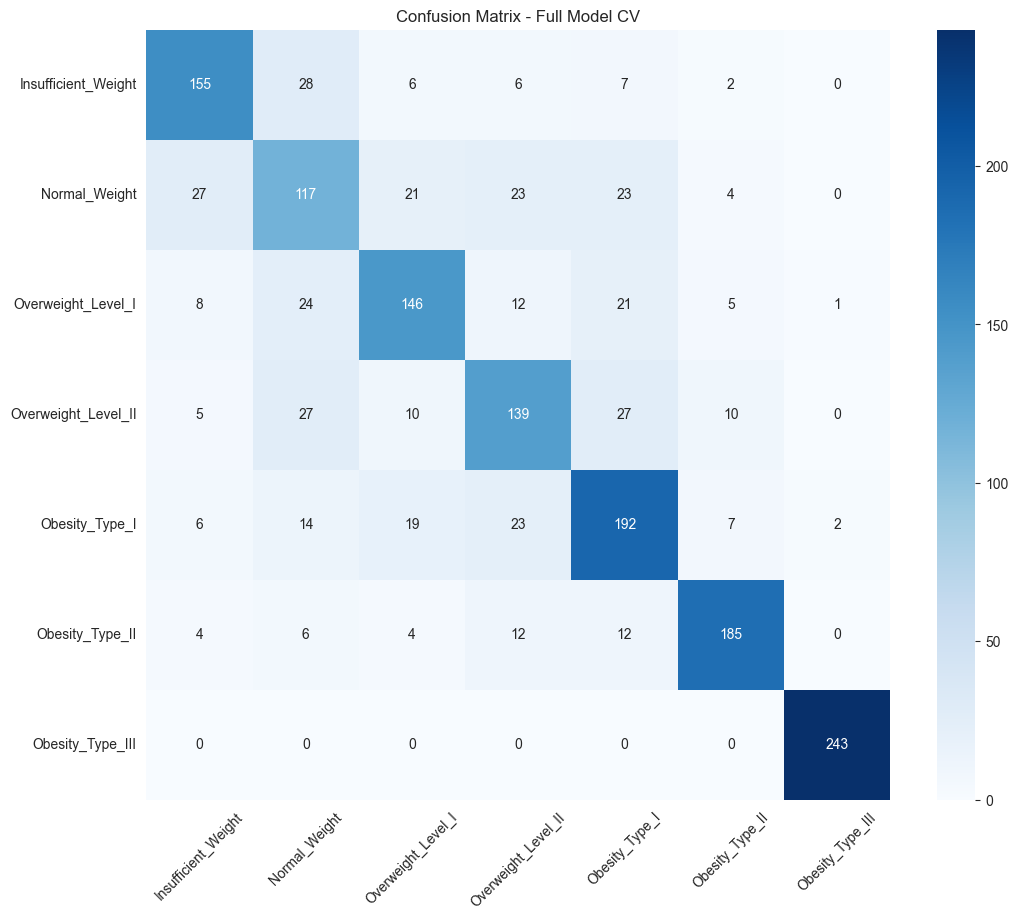

Лучшие параметры (полная модель): {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшее качество на кросс-валидации (полная модель): 0.744

Classification Report - Full Model CV:
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.76      0.76       204
      Normal_Weight       0.54      0.54      0.54       215
 Overweight_Level_I       0.71      0.67      0.69       217
Overweight_Level_II       0.65      0.64      0.64       218
     Obesity_Type_I       0.68      0.73      0.70       263
    Obesity_Type_II       0.87      0.83      0.85       223
   Obesity_Type_III       0.99      1.00      0.99       243

           accuracy                           0.74      1583
          macro avg       0.74      0.74      0.74      1583
       weighted avg       0.74      0.74      0.74      1583



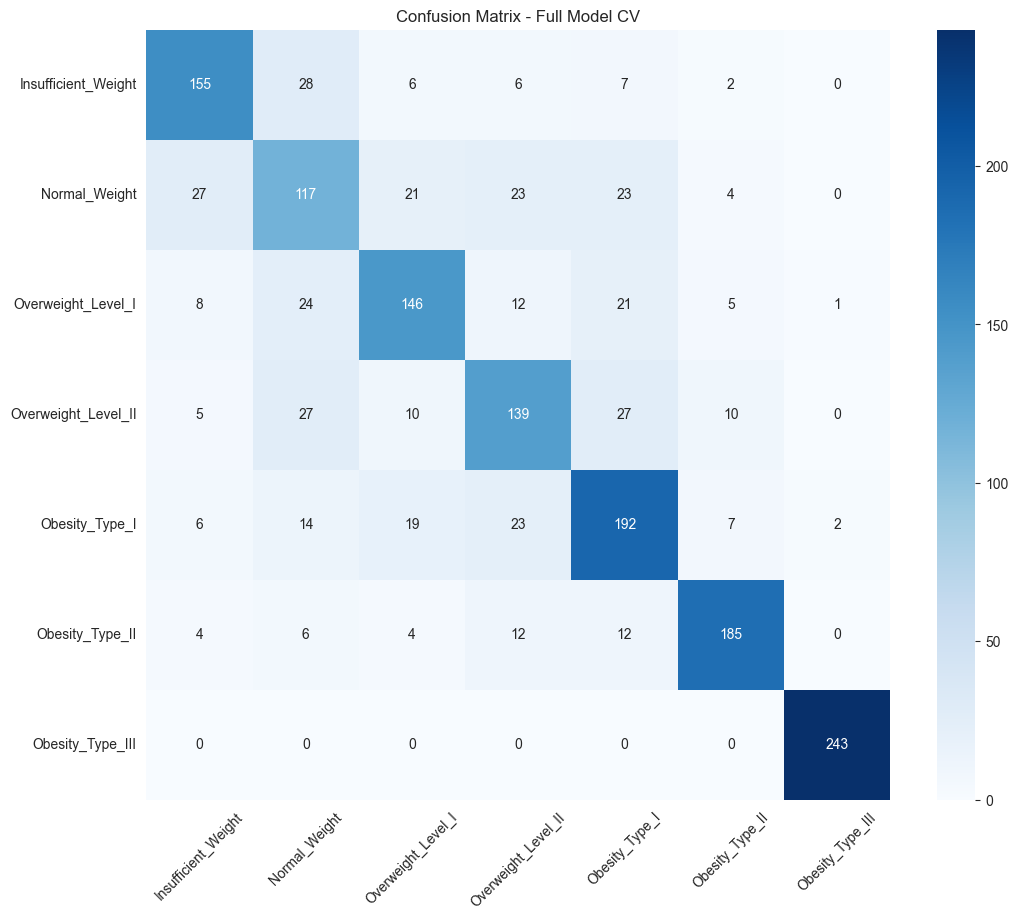

In [51]:
# Подбор гиперпараметров для полной модели
dtc_full = DecisionTreeClassifier(random_state=42)

param_grid_full = {
    'max_depth': [5, 7, 9, 11, 13, 15, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.02],
    'class_weight': [None, 'balanced']
}

gs_full = GridSearchCV(
    dtc_full,
    param_grid=param_grid_full,
    cv=skf,
    scoring='f1_weighted',
    n_jobs=-1
)
gs_full.fit(X_train_full, y_train_full)

print(f'Лучшие параметры (полная модель): {gs_full.best_params_}')
print(f'Лучшее качество на кросс-валидации (полная модель): {gs_full.best_score_:.3f}')

# Оценка полной модели
y_pred_cv_full = cross_val_predict(gs_full.best_estimator_, X_train_full, y_train_full, cv=skf, n_jobs=-1)
print("\nClassification Report - Full Model CV:")
print(classification_report(y_train_full, y_pred_cv_full, target_names=obesity_levels.keys()))

plt.figure(figsize=(12, 10))
sns.heatmap(
    confusion_matrix(y_train_full, y_pred_cv_full),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=list(obesity_levels.keys()),
    yticklabels=list(obesity_levels.keys())
)
plt.title('Confusion Matrix - Full Model CV')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
# Подбор гиперпараметров для полной модели
# dtc_full = DecisionTreeClassifier(random_state=42)
#
# param_grid_full = {
#     'max_depth': [5, 7, 9, 11, 13, 15, None],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6, 8],
#     'max_features': ['sqrt', 'log2', 0.5, 0.7, None],
#     'criterion': ['gini', 'entropy'],
#     'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.02],
#     'class_weight': [None, 'balanced']
# }
#
# gs_full = GridSearchCV(
#     dtc_full,
#     param_grid=param_grid_full,
#     cv=skf,
#     scoring='f1_weighted',
#     n_jobs=-1
# )
# gs_full.fit(X_train_full, y_train_full)
#
# print(f'Лучшие параметры (полная модель): {gs_full.best_params_}')
# print(f'Лучшее качество на кросс-валидации (полная модель): {gs_full.best_score_:.3f}')
#
# Оценка полной модели
# y_pred_cv_full = cross_val_predict(gs_full.best_estimator_, X_train_full, y_train_full, cv=skf, n_jobs=-1)
# print("\nClassification Report - Full Model CV:")
# print(classification_report(y_train_full, y_pred_cv_full, target_names=obesity_levels.keys()))
#
# plt.figure(figsize=(12, 10))
# sns.heatmap(
#     confusion_matrix(y_train_full, y_pred_cv_full),
#     annot=True,
#     fmt='d',
#     cmap='Blues',
#     xticklabels=list(obesity_levels.keys()),
#     yticklabels=list(obesity_levels.keys())
# )
# plt.title('Confusion Matrix - Full Model CV')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.show()


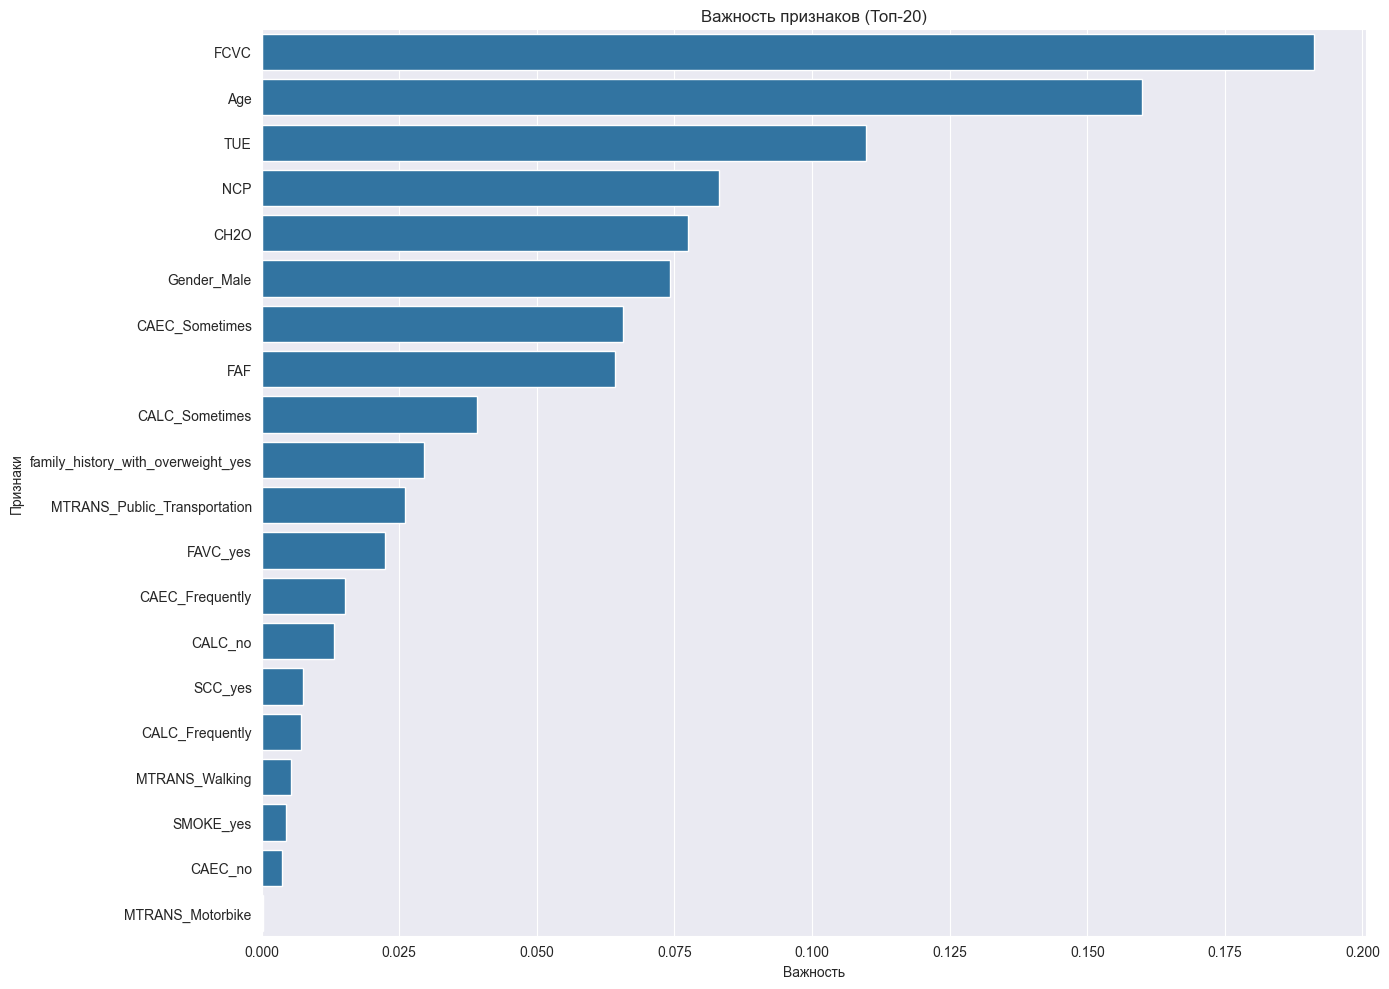


Топ-10 наиболее важных признаков:
                               feature  importance
1                                 FCVC    0.191145
0                                  Age    0.159953
5                                  TUE    0.109813
2                                  NCP    0.083085
3                                 CH2O    0.077456
6                          Gender_Male    0.074185
10                      CAEC_Sometimes    0.065581
4                                  FAF    0.064275
15                      CALC_Sometimes    0.039135
7   family_history_with_overweight_yes    0.029480
Отобрано признаков: 14 из 21
Лучшие параметры (отобранные признаки): {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшее качество (отобранные признаки): 0.736

Classification Report - Selected Features CV:
                     precision    recall  f1-score   support

Insufficient_Weight       0.

In [54]:
# Анализ важности признаков
feature_importances = gs_full.best_estimator_.feature_importances_
features = X_train_full.columns

plt.figure(figsize=(14, 10))
feature_imp_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
feature_imp_df = feature_imp_df.sort_values('importance', ascending=False).head(20)

sns.barplot(data=feature_imp_df, x='importance', y='feature')
plt.title('Важность признаков (Топ-20)')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

print("\nТоп-10 наиболее важных признаков:")
print(feature_imp_df.head(10))
# Отбор признаков по важности
threshold = 0.01
selected_features = features[feature_importances > threshold]
print(f"Отобрано признаков: {len(selected_features)} из {len(features)}")

if len(selected_features) > 0:
    X_train_selected = X_train_full[selected_features]
    X_test_selected = X_test_full[selected_features]
else:
    print("Нет признаков с важностью > 0.01. Используем все признаки.")
    X_train_selected = X_train_full
    X_test_selected = X_test_full
    selected_features = features
# Обучение на отобранных признаках
dtc_selected = DecisionTreeClassifier(random_state=42)

param_grid_selected = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.001, 0.005],
    'class_weight': [None, 'balanced']
}

gs_selected = GridSearchCV(
    dtc_selected,
    param_grid=param_grid_selected,
    cv=skf,
    scoring='f1_weighted',
    n_jobs=-1
)
gs_selected.fit(X_train_selected, y_train_full)

print(f'Лучшие параметры (отобранные признаки): {gs_selected.best_params_}')
print(f'Лучшее качество (отобранные признаки): {gs_selected.best_score_:.3f}')

y_pred_cv_selected = cross_val_predict(
    gs_selected.best_estimator_,
    X_train_selected,
    y_train_full,
    cv=skf,
    n_jobs=-1
)
print("\nClassification Report - Selected Features CV:")
print(classification_report(y_train_full, y_pred_cv_selected, target_names=obesity_levels.keys()))



In [55]:
# Финальная оценка на тестовых данных
print("=" * 60)
print("ФИНАЛЬНАЯ ОЦЕНКА НА ТЕСТОВЫХ ДАННЫХ")
print("=" * 60)

# Простая модель
y_test_pred_simple = gs.predict(X_test_simple)
print("\n1. Простая модель (Age, NCP):")
print("-" * 40)
print(classification_report(y_test, y_test_pred_simple, target_names=obesity_levels.keys()))

# Полная модель
y_test_pred_full = gs_full.predict(X_test_full)
print("\n2. Полная модель (все признаки):")
print("-" * 40)
print(classification_report(y_test_full, y_test_pred_full, target_names=obesity_levels.keys()))

# Улучшенная модель
y_test_pred_selected = gs_selected.predict(X_test_selected)
print("\n3. Улучшенная модель (отобранные признаки):")
print("-" * 40)
print(classification_report(y_test_full, y_test_pred_selected, target_names=obesity_levels.keys()))



ФИНАЛЬНАЯ ОЦЕНКА НА ТЕСТОВЫХ ДАННЫХ

1. Простая модель (Age, NCP):
----------------------------------------
                     precision    recall  f1-score   support

Insufficient_Weight       0.55      0.47      0.51        68
      Normal_Weight       0.53      0.58      0.56        72
 Overweight_Level_I       0.44      0.25      0.32        73
Overweight_Level_II       0.32      0.14      0.19        72
     Obesity_Type_I       0.42      0.25      0.31        88
    Obesity_Type_II       0.34      0.53      0.41        74
   Obesity_Type_III       0.41      0.77      0.54        81

           accuracy                           0.43       528
          macro avg       0.43      0.43      0.40       528
       weighted avg       0.43      0.43      0.40       528


2. Полная модель (все признаки):
----------------------------------------
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.79      0.84        68
      Normal_Weight 

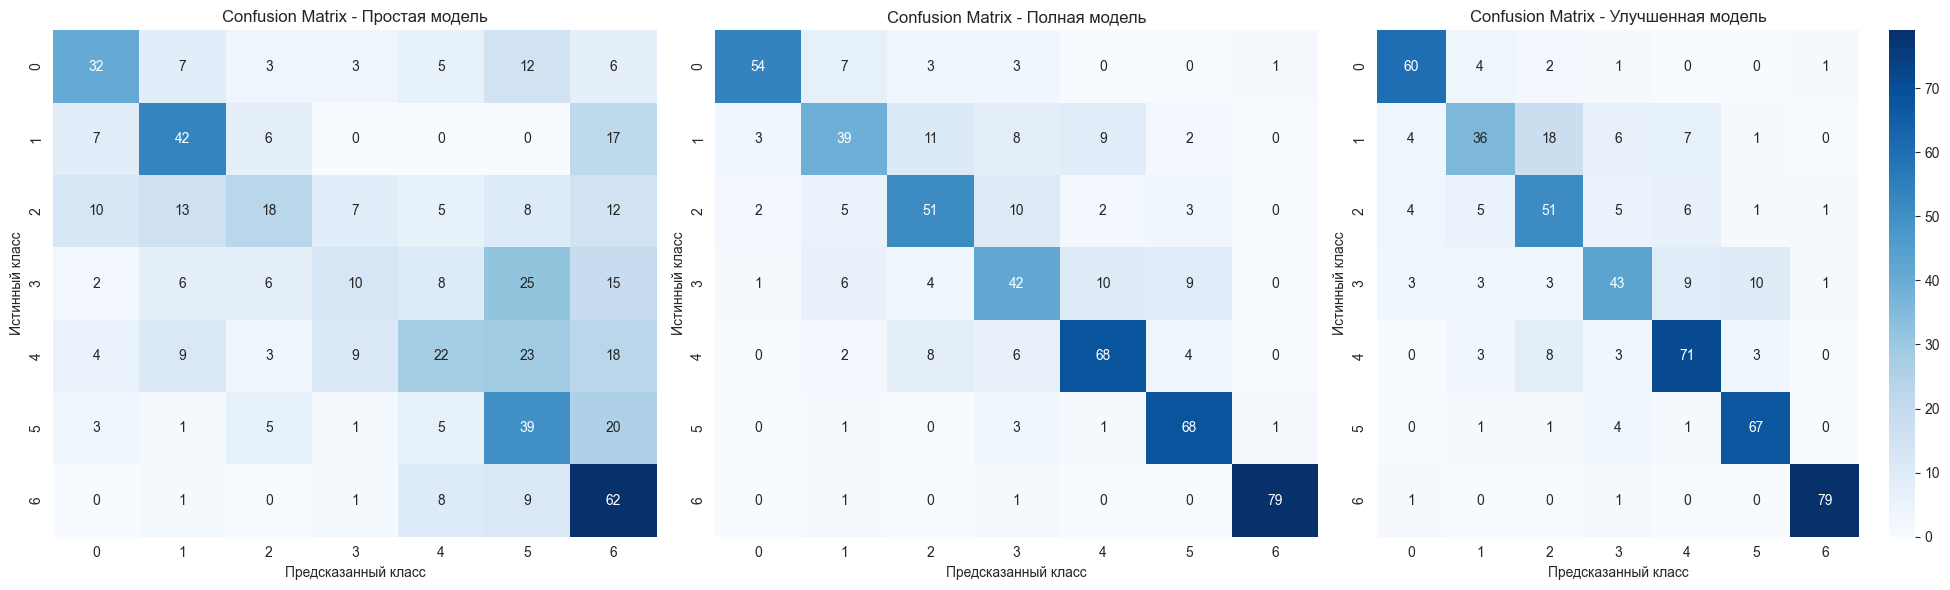

In [56]:
# Визуализация финальных confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Простая модель
sns.heatmap(
    confusion_matrix(y_test, y_test_pred_simple),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[0],
    cbar=False
)
axes[0].set_title('Confusion Matrix - Простая модель')
axes[0].set_xlabel('Предсказанный класс')
axes[0].set_ylabel('Истинный класс')

# Полная модель
sns.heatmap(
    confusion_matrix(y_test_full, y_test_pred_full),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[1],
    cbar=False
)
axes[1].set_title('Confusion Matrix - Полная модель')
axes[1].set_xlabel('Предсказанный класс')
axes[1].set_ylabel('Истинный класс')

# Улучшенная модель
im = sns.heatmap(
    confusion_matrix(y_test_full, y_test_pred_selected),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[2]
)
axes[2].set_title('Confusion Matrix - Улучшенная модель')
axes[2].set_xlabel('Предсказанный класс')
axes[2].set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

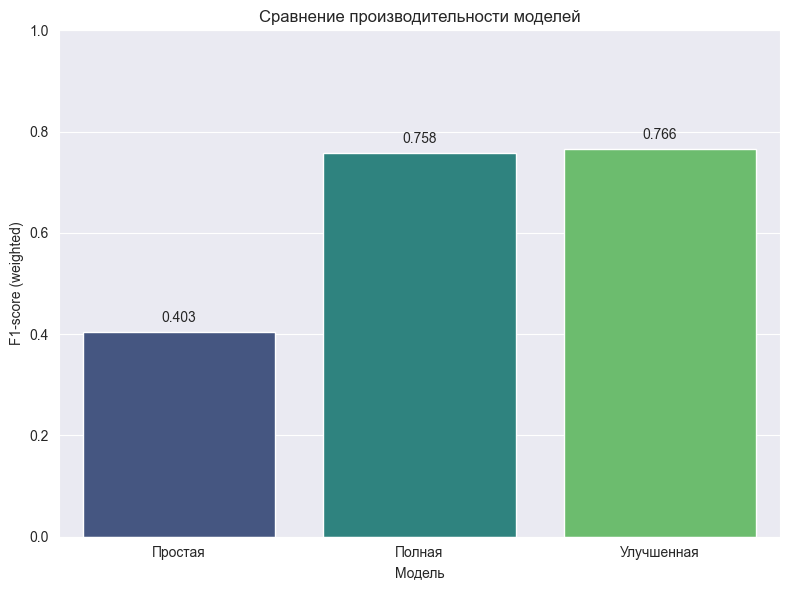


Сравнение производительности моделей:
       Модель  F1-score (weighted)
0     Простая             0.403307
1      Полная             0.757740
2  Улучшенная             0.765963


In [57]:
# Сравнение производительности моделей
from sklearn.metrics import f1_score

models = ['Простая', 'Полная', 'Улучшенная']
predictions = [y_test_pred_simple, y_test_pred_full, y_test_pred_selected]
f1_scores = []

for i, pred in enumerate(predictions):
    if i == 0:
        # Простая модель использует y_test
        f1_scores.append(f1_score(y_test, pred, average='weighted'))
    else:
        # Полная и улучшенная модели используют y_test_full
        f1_scores.append(f1_score(y_test_full, pred, average='weighted'))

performance_df = pd.DataFrame({
    'Модель': models,
    'F1-score (weighted)': f1_scores
})

plt.figure(figsize=(8, 6))
sns.barplot(data=performance_df, x='Модель', y='F1-score (weighted)', palette='viridis')
plt.title('Сравнение производительности моделей')
plt.ylim(0, 1)
plt.ylabel('F1-score (weighted)')
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

print("\nСравнение производительности моделей:")
print(performance_df)

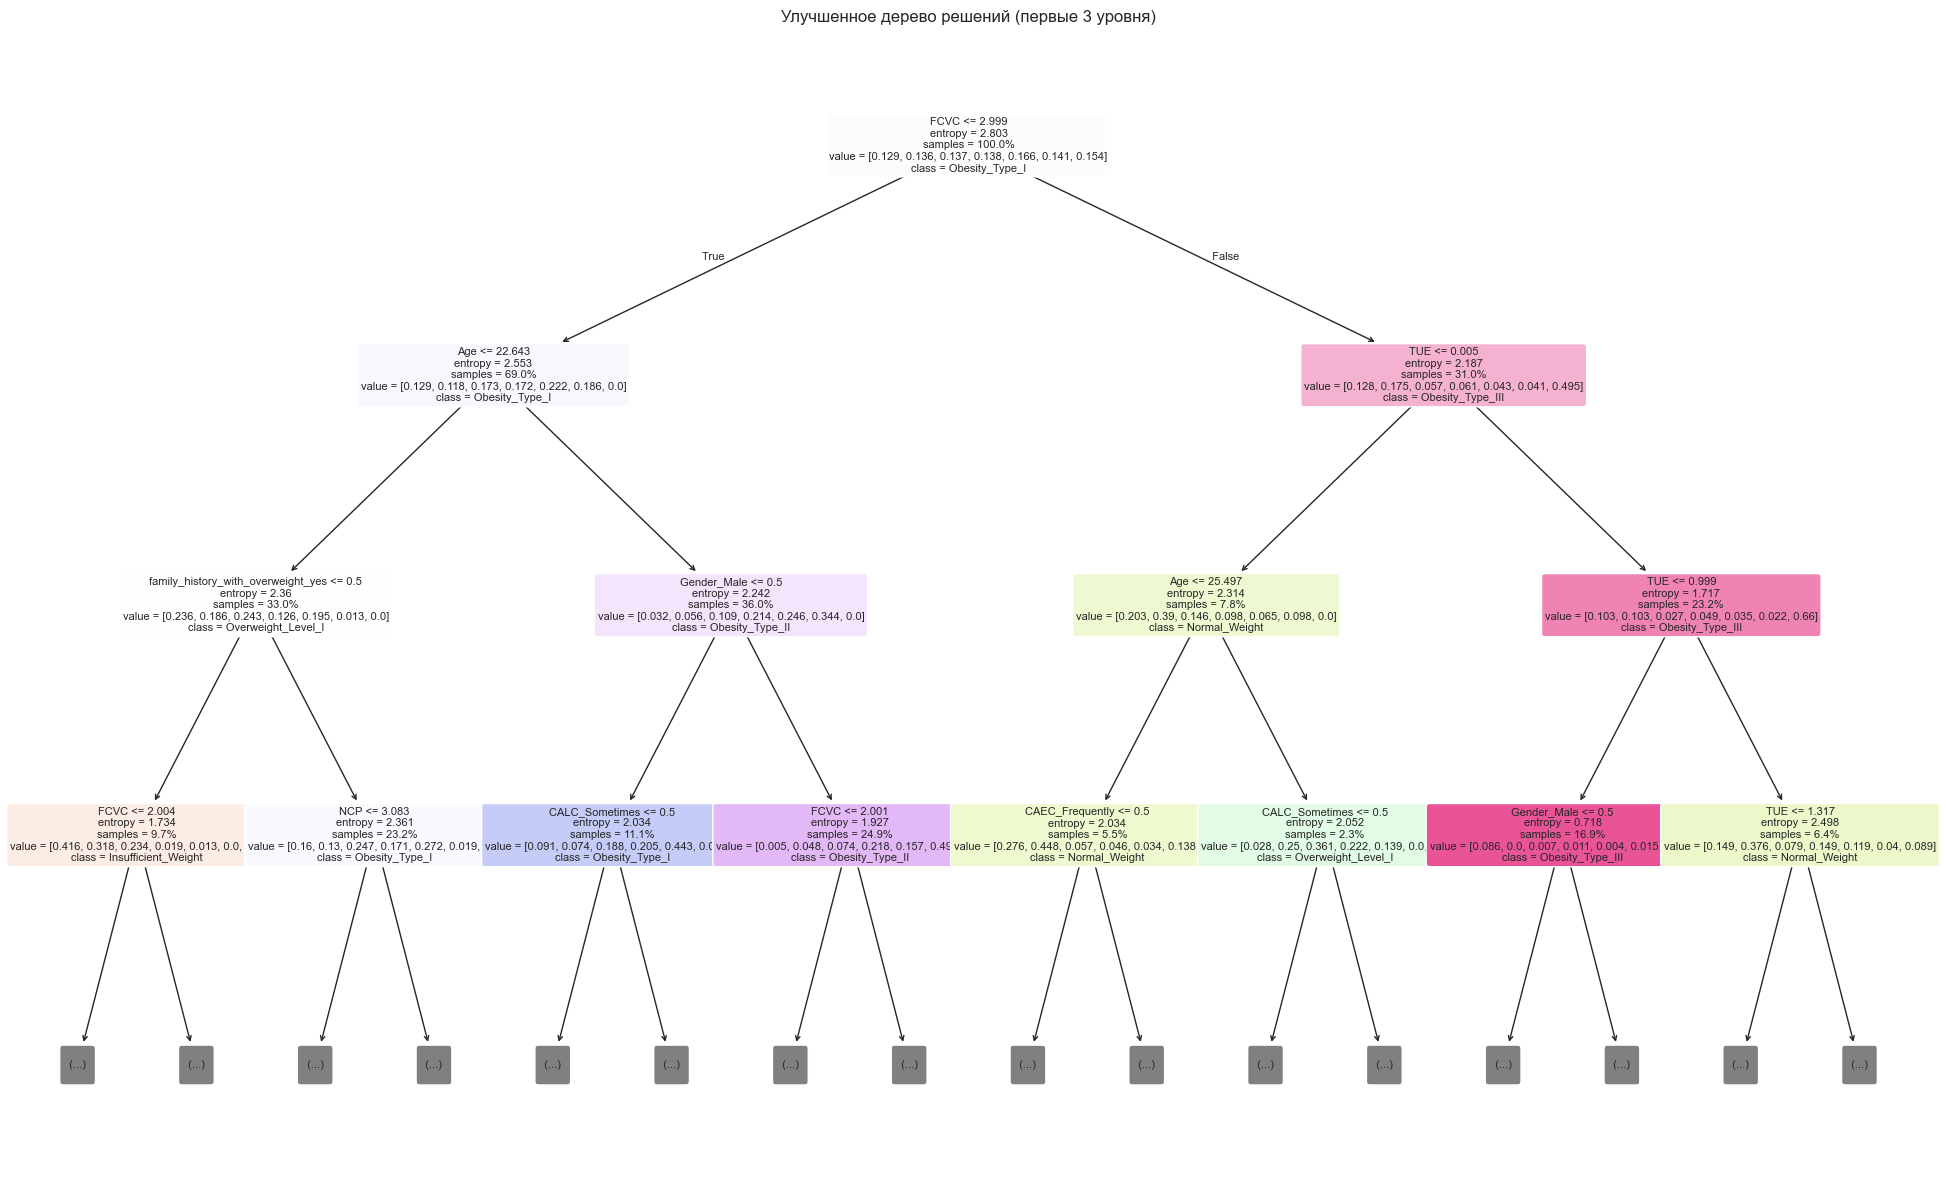

In [58]:
# Визуализация улучшенного дерева (упрощенная версия)
plt.figure(figsize=(20, 12))
plot_tree(
    gs_selected.best_estimator_,
    feature_names=selected_features,
    class_names=list(obesity_levels.keys()),
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3,
    proportion=True
)
plt.title('Улучшенное дерево решений (первые 3 уровня)')
plt.tight_layout()
plt.show()